***AUTHOR : KALIAPPAN YADAV***

---


**TSF TASK 1 : PREDICTING SCORE USING LINEAR REGRESSION**

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error,confusion_matrix,mean_squared_error,roc_curve,roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split,cross_val_score

In [2]:
%matplotlib inline

**IMPORTING DATA**

In [3]:
data = pd.read_csv("http://bit.ly/w-data")
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


**DATA ANALYSIS**

In [4]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
hours = data.iloc[:,:-1].values
scores = data.iloc[:,1].values

***DATA VISUALIZATION***

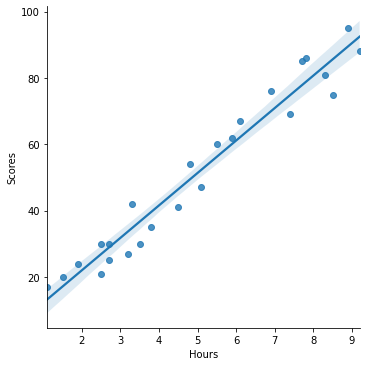

In [7]:
sns.lmplot(x='Hours',y='Scores',data=data)

***SPLITTING DATA***

In [8]:
feature_train,feature_test,label_train,label_test = train_test_split(hours,scores,test_size=0.2,random_state=42)
print("Shapes of the test and validation data " ,feature_train.shape,feature_test.shape,label_train.shape,label_test.shape)

Shapes of the test and validation data  (20, 1) (5, 1) (20,) (5,)


**MODEL INITIALIZATION AND TRAINING**

In [9]:
model = LinearRegression()
model.fit(feature_train,label_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**MODEL PREDICTION**

In [10]:
pred = model.predict(feature_test)

**PLOTTING THE MODEL'S REGRESSION LINE**

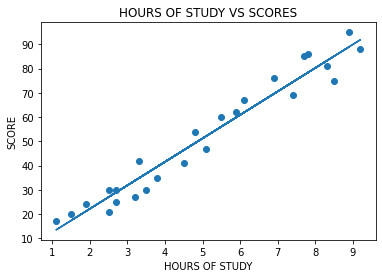

In [11]:
reg_line = model.coef_*hours+model.intercept_
plt.scatter(hours, scores)
plt.title("HOURS OF STUDY VS SCORES")
plt.xlabel("HOURS OF STUDY")
plt.ylabel("SCORE")
plt.plot(hours, reg_line);
plt.show()

***PREDICTING SCORE***

In [12]:
test=[[9.25]]
result = model.predict(test)
print("If a Student studies for 9.25hrs per day he/she will score ",*result)

If a Student studies for 9.25hrs per day he/she will score  92.38611528261494


***ANALYSING THE PREDICTION***

In [13]:
report = pd.DataFrame({'Actual_score':label_test,'Predicted_score ':pred})
report

,Actual_score,Predicted_score
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


***EVALUATION OF MODEL***

In [14]:
model.score(feature_test,label_test)

0.9678055545167994

In [15]:
print("Mean Absolute error : ",mean_absolute_error(label_test, pred))
print("Mean Squared error : ",mean_squared_error(label_test, pred))
print("Root Mean Squared error : ",np.sqrt(mean_squared_error(label_test, pred)))

Mean Absolute error :  3.9207511902099244
Mean Squared error :  18.943211722315272
Root Mean Squared error :  4.352380006653288


# PIPELINE


In [16]:
model_2 = LinearRegression()

In [17]:
my_pipeline = Pipeline(steps = [('model',model_2)])
my_pipeline.fit(feature_train,label_train)
pred_2 = my_pipeline.predict(feature_test)
print("Pipeline score : ",my_pipeline.score(feature_test,label_test))

Pipeline score :  0.9678055545167994


**EVALUATING THE PIPELINE**


In [18]:
print("Mean Absolute error : ",mean_absolute_error(label_test, pred_2))
print("Mean Squared error : ",mean_squared_error(label_test, pred_2))
print("Root Mean Squared error : ",np.sqrt(mean_squared_error(label_test, pred_2)))

Mean Absolute error :  3.9207511902099244
Mean Squared error :  18.943211722315272
Root Mean Squared error :  4.352380006653288
